In [1]:
#importing libraries 
import numpy as n
import pandas as p
import matplotlib.pyplot as pt



Accessing Dataset 

In [2]:
data="http://bit.ly/w-data"
d=p.read_csv(data)
d.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


To get statistical summary

In [3]:
d.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


To get information or concise summary

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plotting the data

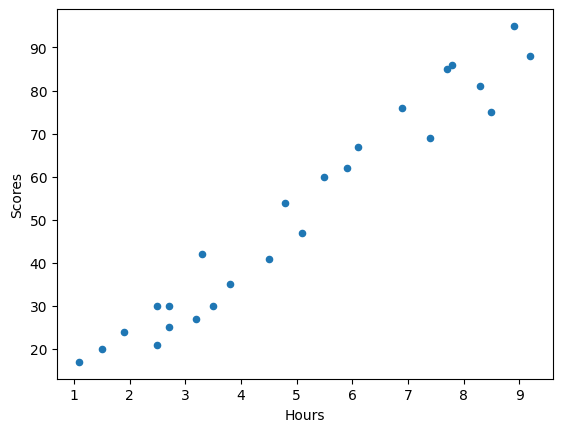

In [5]:
d.plot(kind='scatter',x='Hours',y='Scores')
pt.show()

In [6]:
d.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here,we can see positive correlation.

In [7]:
d.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


so,we can conclude if the no. of hours increase,score will also increase.

To adjust dimension to fit first argument

In [8]:
p=d["Hours"].values.reshape(-1,1)
q=d["Scores"].values

Here,Training and Testing of Model will be done

In [9]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.15,random_state=52)

LINEAR REGRESSION

In [10]:
from sklearn.linear_model import LinearRegression
md=LinearRegression()
md.fit(p_train,q_train)
q_pr=md.predict(p_test)


Here,we will plot the Regression line by finding regression coefficient and intercept of line

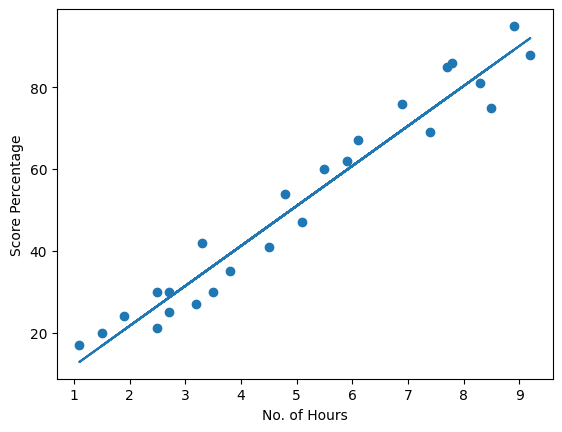

In [11]:
a=md.coef_
b=md.intercept_
l=a*p+b
pt.scatter(p,q)
pt.xlabel("No. of Hours")
pt.ylabel("Score Percentage")
pt.plot(p,l)
pt.show()

Now,We will evaluate the model

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("The Absolute error value= ",mean_absolute_error(q_test,q_pr))
print("The Mean error value= ",mean_squared_error(q_test,q_pr,squared=False))

The Absolute error value=  4.2719079627335566
The Mean error value=  4.321500182190324


Checking Accuracy of model

In [13]:
print("Accuracy = ",md.score(p_test,q_test))

Accuracy =  0.959897219004867


Calculation of result for given value

In [14]:
Hours = [9]
val = md.predict([Hours])

print("HOURS = {}".format([Hours]))
print("RESULT = {}".format(val[0]))

HOURS = [[9]]
RESULT = 90.0746611641732


Hence,we conclude that Predicted score will be 92.51956598227572 when a student will study for 9.25 hours